<div>
<img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2019/11/07200611/shutterstock_1061069282.jpg" width="750" style="margin: 5px auto; display: block; position: relative; left: -30px;" />
</div>


## Submodule -1.3 : Deep Neural Networks

## Table of Contents
#### 1. [Spectral Biases](#Spectral-Biases)
#### 2. [Activation functions ](#Activation-functions )

# Spectral Biases

In [1]:
from __future__ import print_function

import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
np.random.seed(1234)

In [2]:
## Input Function and Fourier Transform

# Function Definitions
def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

## Fourier Transform of 1D Routine
def F_transform(fun):
    F_t = np.fft.fft(fun)
    return F_t

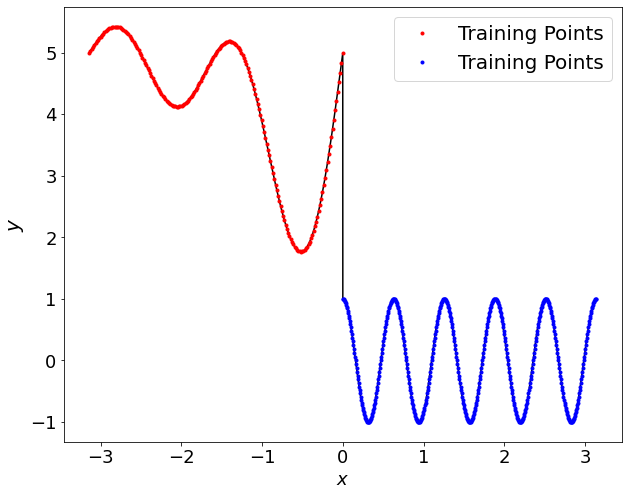

In [3]:
fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')

ax1.plot(x_in_l, y_in_l, 'r.', label="Training Points")
ax1.plot(x_in_r, y_in_r, 'b.', label="Training Points")
ax1.set_xlabel('$x$',  fontsize=18)
ax1.set_ylabel('$y$', fontsize=20)
ax1.legend(loc=1, prop={'size': 20})
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=18)

In [4]:
#### Training Routine

## Neural Network Classes

class Net(nn.Module):
    def __init__(self, input_dim, hidden_layers, num_neurons, output_dim):
        super(Net, self).__init__()
        self.net = nn.Sequential()
        self.net.add_module("lin_layer_0", nn.Linear(input_dim,num_neurons))
        self.net.add_module("tanh_layer_0", nn.Tanh())

        for num in range(1, hidden_layers+1):
            self.net.add_module("lin_layer_%d" %(num), nn.Linear(num_neurons, num_neurons))
            self.net.add_module("tanh_layer_%d", nn.Tanh())

        self.net.add_module("lin_layer_output", nn.Linear(num_neurons, output_dim))
        
    def forward(self, x):
        return self.net(x)



if __name__ == "__main__":
        
    # Data for Traning and Testing
    x = np.linspace(-np.pi, np.pi, 129, dtype=np.float64)
    x = np.reshape(x, (-1, 1))
    y = np.array([fun_x(i) for i in x])

    F_y = F_transform(y[0:-1, 0])
    F_y_abs = abs(F_y)
    x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
    x_in_r = np.linspace(0., np.pi, 501)
    x_in = np.concatenate((x_in_l, x_in_r), axis=0)
    y_in = np.array([fun_x(i) for i in x_in])
    
    
    N_i = 1
    N_o = 1
    L =  2
    N = 40   
    net = Net(N_i, L, N, N_o)    
    x_train = torch.from_numpy(x_in.reshape(-1,1)).float()
    y_train = torch.from_numpy(y_in.reshape(-1,1)).float()
    x_test =  torch.from_numpy(x.reshape(-1,1)).float()
       
    optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-03)
    loss_func = torch.nn.MSELoss()
   
    
    N_iter = 50000 #100000
    loss_f_list = []
    F_y_list = []
    y_p_list = []
    inputs = Variable(x_train)
    outputs = Variable(y_train)
    
    for n in range(N_iter):
        prediction = net(inputs)
        loss = loss_func(prediction, outputs) 
        optimizer.zero_grad()
        loss.backward()        
        optimizer.step()  
        
        if n%100 == 0:
            y_pred= net(x_test)
            y_pred_ = y_pred.data.numpy()
            F_y_ = F_transform(y_pred_[0:-1, 0])
            F_y_abs_ = abs(F_y_)
            F_y_abs_ = np.reshape(F_y_abs_, (-1, 1))
            loss_f = abs(F_y - F_y_)/(1.0e-9 + abs(F_y))
            loss_f = np.reshape(loss_f, (-1, 1))
            y_pred_ = np.reshape(y_pred_, (-1, 1))
            y_p_list.append(y_pred_)
            loss_f_list.append(loss_f)
            F_y_list.append(F_y_abs_)
            print('Steps: %d, loss: %.3e'%(n, loss))
            
            
    loss_f_out = np.concatenate(loss_f_list, axis=1)
    F_y_out = np.concatenate(F_y_list, axis=1)
    y_out = np.concatenate(y_p_list, axis=1)
    y_pred_ = net(x_test)
    
            

Steps: 0, loss: 5.662e+00
Steps: 100, loss: 6.355e-01
Steps: 200, loss: 6.285e-01
Steps: 300, loss: 6.222e-01
Steps: 400, loss: 6.135e-01
Steps: 500, loss: 5.994e-01
Steps: 600, loss: 5.754e-01
Steps: 700, loss: 5.407e-01
Steps: 800, loss: 4.997e-01
Steps: 900, loss: 4.515e-01
Steps: 1000, loss: 4.070e-01
Steps: 1100, loss: 3.936e-01
Steps: 1200, loss: 3.845e-01
Steps: 1300, loss: 3.714e-01
Steps: 1400, loss: 3.555e-01
Steps: 1500, loss: 3.407e-01
Steps: 1600, loss: 3.337e-01
Steps: 1700, loss: 3.256e-01
Steps: 1800, loss: 3.225e-01
Steps: 1900, loss: 3.227e-01
Steps: 2000, loss: 3.175e-01
Steps: 2100, loss: 3.168e-01
Steps: 2200, loss: 3.115e-01
Steps: 2300, loss: 3.110e-01
Steps: 2400, loss: 3.055e-01
Steps: 2500, loss: 3.030e-01
Steps: 2600, loss: 3.008e-01
Steps: 2700, loss: 2.984e-01
Steps: 2800, loss: 2.960e-01
Steps: 2900, loss: 2.933e-01
Steps: 3000, loss: 3.149e-01
Steps: 3100, loss: 2.866e-01
Steps: 3200, loss: 2.818e-01
Steps: 3300, loss: 2.761e-01
Steps: 3400, loss: 2.691e-

Steps: 27900, loss: 1.311e-03
Steps: 28000, loss: 4.391e-03
Steps: 28100, loss: 1.301e-03
Steps: 28200, loss: 1.308e-03
Steps: 28300, loss: 1.292e-03
Steps: 28400, loss: 1.295e-03
Steps: 28500, loss: 1.279e-03
Steps: 28600, loss: 1.387e-03
Steps: 28700, loss: 2.744e-03
Steps: 28800, loss: 1.264e-03
Steps: 28900, loss: 1.542e-03
Steps: 29000, loss: 1.255e-03
Steps: 29100, loss: 3.563e-03
Steps: 29200, loss: 1.250e-03
Steps: 29300, loss: 1.240e-03
Steps: 29400, loss: 9.581e-03
Steps: 29500, loss: 1.232e-03
Steps: 29600, loss: 1.467e-03
Steps: 29700, loss: 1.269e-03
Steps: 29800, loss: 1.217e-03
Steps: 29900, loss: 1.211e-03
Steps: 30000, loss: 1.456e-03
Steps: 30100, loss: 1.323e-03
Steps: 30200, loss: 1.201e-03
Steps: 30300, loss: 1.195e-03
Steps: 30400, loss: 1.409e-03
Steps: 30500, loss: 1.293e-03
Steps: 30600, loss: 1.181e-03
Steps: 30700, loss: 1.266e-03
Steps: 30800, loss: 1.173e-03
Steps: 30900, loss: 1.179e-03
Steps: 31000, loss: 1.262e-03
Steps: 31100, loss: 1.161e-03
Steps: 312

In [14]:
import os
import glob

file_list = glob.glob('./*.png')

try:
    os.remove(file_list)
except:
    print("Files_do_not exist!")

l1 = len(y_p_list)
l2 = len(F_y_list)
print(f"Length Test: {l1==l2}")
print(f"l1 is: {l1} and l2: {l2}")
freq = np.arange(0,63,1)

for i in range(0,l1,200):
    print(f"Making an image at {i} iteration.")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
    ax1.plot(x, y, 'k-', label="Actual Function")
    y_pred_ = y_p_list[i]
    ax1.plot(x, y_pred_, 'r.', markersize=10, label="Predicted Function")
    ax1.title.set_text('Physical Space')
    ax1.set_xlabel('$x$', fontsize=20)
    ax1.set_ylabel('$y$', fontsize=20)
    ax1.legend(loc=1, prop={'size': 20})
    ax1.tick_params(axis='both', which='major', labelsize=18)
    ax1.tick_params(axis='both', which='minor', labelsize=18)
    ax1.legend()
    F_y_ = F_y_list[i]
    F_y_abs_ = abs(F_y_)
    F_y_abs_ = np.reshape(F_y_abs_, (-1, 1))
    ax2.semilogy(freq, F_y_abs[0:63], 'k-', label="Original Spectrum")
    ax2.semilogy(freq, F_y_abs_[0:63], 'r--', markersize=10, label="Predicted Spectrum")
    ax2.title.set_text('Fourier Space')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('$\hat{y}$')
    ax2.legend()
    ax2.set_xlabel('$x$', fontsize=20)
    ax2.set_ylabel('$y$', fontsize=20)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='minor', labelsize=18)
    if i < 10:
        plt.savefig("image_00" + str(i), dpi=150)
    elif i>9 and i < 100:
        plt.savefig("image_0" + str(i), dpi=150)
    else:
        plt.savefig("image_" + str(i), dpi=150)
        
    plt.close(fig)
   
    


Files_do_not exist!
Length Test: True
l1 is: 500 and l2: 500
Making an image at 0 iteration.
Making an image at 200 iteration.
Making an image at 400 iteration.


In [38]:
#!pip install Pillow

import glob
from PIL import Image


fp_in = "snap_shots/image_*.png"
fp_out = "snap_shots/image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)


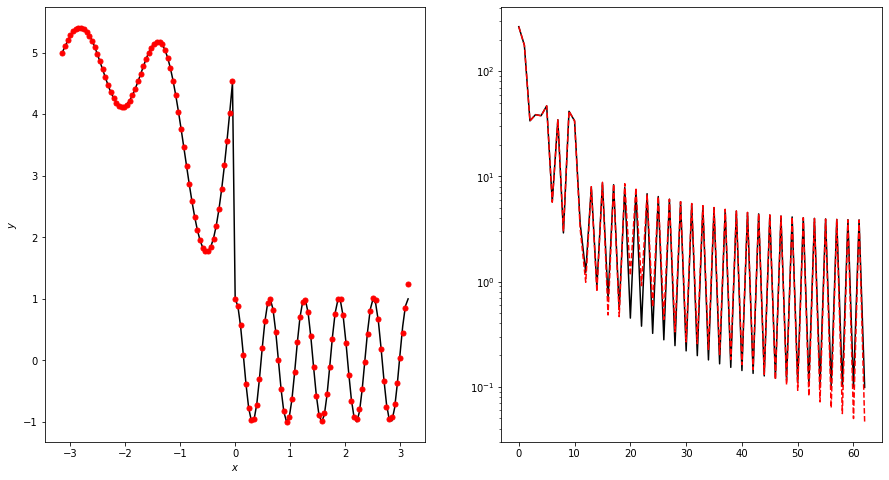

In [68]:
y_pred_ = net(x_test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
ax1.plot(x, y, 'k-')
y_pred_ = y_pred.data.numpy()
ax1.plot(x, y_pred_, 'r.', markersize=10)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
#ax1.legend()

freq = np.arange(0,63,1)
F_y_ = F_transform(y_pred_[0:-1, 0])
F_y_abs_ = abs(F_y_)
F_y_abs_ = np.reshape(F_y_abs_, (-1, 1))
ax2.semilogy(freq, F_y_abs[0:63], 'k-')
ax2.semilogy(freq, F_y_abs_[0:63], 'r--', markersize=10)



# Activation functions 

In [2]:
import numpy as np
import os

def leaky_relu(z, alpha=0.02):
    return np.maximum(alpha*z, z)

def adaptive_leaky_relu(z, alpha=0.02, a=1):
    z=a*z
    return np.maximum(alpha*z, z)


def sigmoid(z):
    return 1/(1+np.exp(-z))

def adaptive_sigmoid(z, a=1):
    z=a*z
    return 1/(1+np.exp(-z))

def tanh(z):
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

def adaptive_tanh(z, a=1):
    z=a*z
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def adaptive_relu(z, a=1):
    z=a*z
    return np.maximum(0,z)

def elu(z):
    output=[]
    for element in z:
        if element<0:
            output.append(np.exp(element)-1)
        else:
            output.append(element)
    return output

def adaptive_elu(z, a=1):
    z=a*z
    output=[]
    for element in z:
        if element<0:
            output.append(np.exp(element)-1)
        else:
            output.append(element)
    return output

def sin(z):
    return np.sin(z)

def adaptive_sin(z, a=1):
    z=a*z
    return np.sin(z)

def swish(z):
    return z*sigmoid(z)

def adaptive_swish(z, a=1):
    z=a*z
    return z*sigmoid(z)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Unit1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


In [3]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure leaky_relu_plot


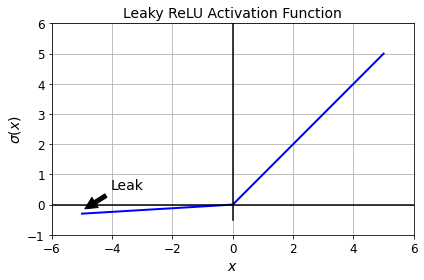

In [4]:
z = np.linspace(-5, 5, 400)
plt.plot(z, leaky_relu(z, 0.06), "b-", linewidth=2)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 6], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("leaky_relu_plot")
plt.show()

Saving figure sigmoid_plot


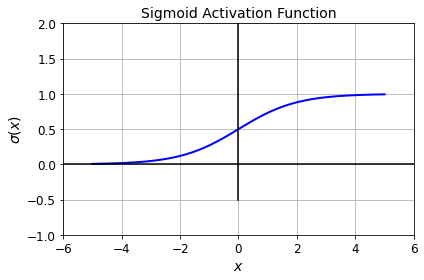

In [5]:
z = np.linspace(-5, 5, 400)
plt.plot(z, sigmoid(z), "b-", linewidth=2)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 6], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Sigmoid Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 6.0])
plt.ylim(-1,2)

plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')

save_fig("sigmoid_plot")
plt.show()

Saving figure tanh_plot


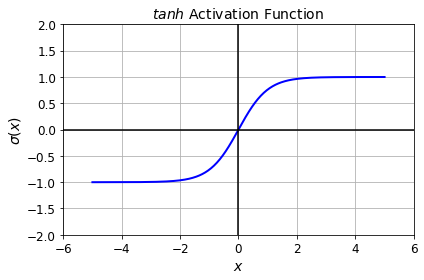

In [6]:
z = np.linspace(-5, 5, 400)
plt.plot(z, tanh(z), "b-", linewidth=2)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-2, 6], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("$\mathit{tanh}$ Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 6.0])
plt.ylim(-2,2)

plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')

save_fig("tanh_plot")
plt.show()

Saving figure relu_plot


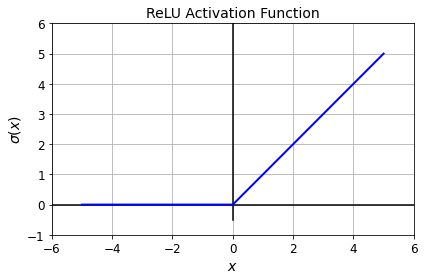

In [7]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 6], 'k-')
plt.plot(z, relu(z), "b-", linewidth=2)
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("ReLU Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("relu_plot")
plt.show()

Saving figure elu_plot


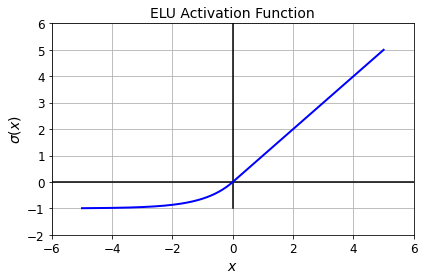

In [8]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-1.0, 6], 'k-')
plt.plot(z, elu(z), "b-", linewidth=2)
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("ELU Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("elu_plot")
plt.show()

Saving figure sin_plot


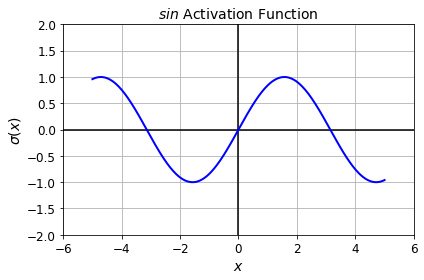

In [9]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-2.0, 6], 'k-')
plt.plot(z, sin(z), "b-", linewidth=2)
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("$\mathit{sin}$ Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 2.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("sin_plot")
plt.show()

Saving figure swish_plot


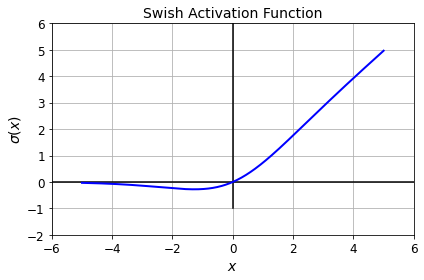

In [10]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-1.0, 6], 'k-')
plt.plot(z, swish(z), "b-", linewidth=2)
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Swish Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("swish_plot")
plt.show()

Saving figure adaptive_sigmoid_plot


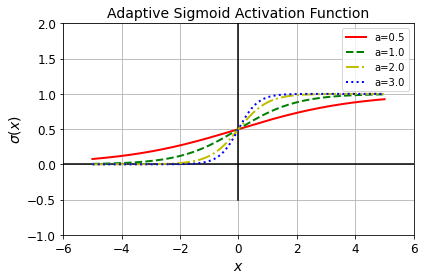

In [11]:
z = np.linspace(-5, 5, 400)

plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 6], 'k-')

plt.plot(z, adaptive_sigmoid(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_sigmoid(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_sigmoid(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_sigmoid(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive Sigmoid Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 6.0])
plt.ylim(-1,2)
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_sigmoid_plot")
plt.show()

Saving figure adaptive_tanh_plot


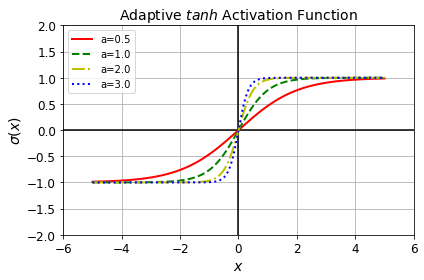

In [12]:
z = np.linspace(-5, 5, 400)

plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-2.0, 2.0], 'k-')

plt.plot(z, adaptive_tanh(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_tanh(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_tanh(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_tanh(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive $\mathit{tanh}$ Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 2.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_tanh_plot")
plt.show()

Saving figure adaptive_relu_plot


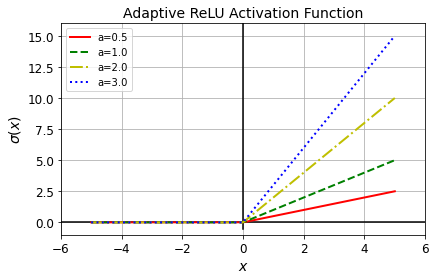

In [13]:
z = np.linspace(-5, 5, 400)

plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 16], 'k-')

plt.plot(z, adaptive_relu(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_relu(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_relu(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_relu(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive ReLU Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 16.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_relu_plot")
plt.show()

Saving figure adaptive_leaky_relu_plot


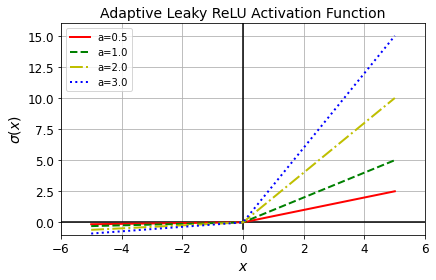

In [14]:
z = np.linspace(-5, 5, 400)

plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 16], 'k-')

plt.plot(z, adaptive_leaky_relu(z, alpha=0.06, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_leaky_relu(z, alpha=0.06, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_leaky_relu(z, alpha=0.06, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_leaky_relu(z, alpha=0.06, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
#plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive Leaky ReLU Activation Function", fontsize=14)
plt.axis([-6, 6, -1.0, 16.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_leaky_relu_plot")
plt.show()

Saving figure adaptive_elu_plot


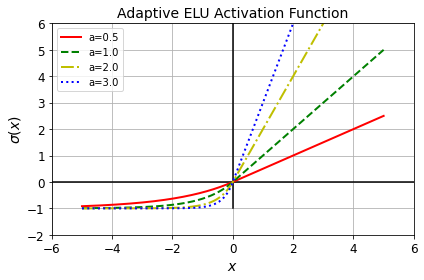

In [15]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-1.0, 6], 'k-')
plt.plot(z, adaptive_elu(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_elu(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_elu(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_elu(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()

plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive ELU Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 6.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_elu_plot")
plt.show()

Saving figure adaptive_sin_plot


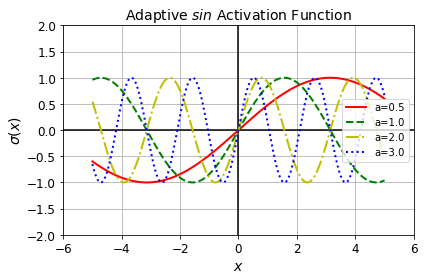

In [16]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-2.0, 6], 'k-')
plt.plot(z, adaptive_sin(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_sin(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_sin(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_sin(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive $\mathit{sin}$ Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 2.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_sin_plot")
plt.show()

Saving figure adaptive_swish_plot


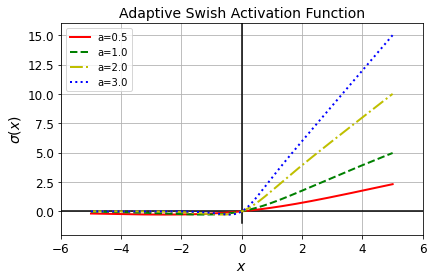

In [17]:
z = np.linspace(-5, 5, 400)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([0, 0], [-1.0, 16], 'k-')
plt.plot(z, adaptive_swish(z, a=0.5), "r-", linewidth=2, label="a=0.5")
plt.plot(z, adaptive_swish(z, a=1.0), "g--", linewidth=2, label="a=1.0")
plt.plot(z, adaptive_swish(z, a=2.0), "y-.", linewidth=2, label="a=2.0")
plt.plot(z, adaptive_swish(z, a=3.0), "b:", linewidth=2, label="a=3.0")
plt.legend()
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
# plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Adaptive Swish Activation Function", fontsize=14)
plt.axis([-6, 6, -2.0, 16.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
save_fig("adaptive_swish_plot")
plt.show()